In [61]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [62]:
%cd /content/MyDrive/MyDrive/siemens/cbir

/content/MyDrive/MyDrive/siemens/cbir


In [63]:
import glob
from itertools import chain
import os
import random
import zipfile
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR, ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms, models
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision
import torchvision.transforms as T

In [64]:
# folder = "./data/test/defect/"

# rgb_values = np.concatenate([Image.open(folder + img).getdata() for img in os.listdir(folder)], axis=0) / 255.

# mu_rgb = np.mean(rgb_values, axis=0)  
# std_rgb = np.std(rgb_values, axis=0)  

In [65]:
mean, std = 0.2601, 0.1779

train_dataset = torchvision.datasets.ImageFolder(root="./data/train/", transform=transforms.Compose([
                                  transforms.Resize((1024, 1024)),
                                  
                                  transforms.ToTensor(),
                                  transforms.Normalize((mean,), (std,))
                              ]))

test_dataset = torchvision.datasets.ImageFolder(root="./data/test/", transform=transforms.Compose([
                                  transforms.Resize((1024, 1024)),
                                  
                                  transforms.ToTensor(),
                                  transforms.Normalize((mean,), (std,))
                              ]))

In [66]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 175
    Root location: ./data/train/
    StandardTransform
Transform: Compose(
               Resize(size=(1024, 1024), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.2601,), std=(0.1779,))
           )

In [67]:
train_labels = np.array(train_dataset.targets)

In [68]:
test_labels = np.array(test_dataset.targets)

In [69]:
test_data = []

for i in test_dataset:
  test_data.append(i[0])


In [70]:
train_dataset[0]

(tensor([[[-0.9771, -0.9771, -0.9991,  ..., -0.6685, -0.7126, -0.6685],
          [-0.9551, -0.9551, -0.9991,  ..., -0.6685, -0.7126, -0.6464],
          [-0.9771, -1.0212, -0.9991,  ..., -0.6685, -0.6244, -0.6685],
          ...,
          [-0.7126, -0.6905, -0.7126,  ..., -0.8669, -0.8007, -0.8889],
          [-0.6905, -0.6905, -0.7126,  ..., -0.8669, -0.8007, -0.8228],
          [-0.7126, -0.7126, -0.7346,  ..., -0.8669, -0.9110, -0.8669]],
 
         [[-0.9771, -0.9771, -0.9991,  ..., -0.6685, -0.7126, -0.6685],
          [-0.9551, -0.9551, -0.9991,  ..., -0.6685, -0.7126, -0.6464],
          [-0.9771, -1.0212, -0.9991,  ..., -0.6685, -0.6244, -0.6685],
          ...,
          [-0.7126, -0.6905, -0.7126,  ..., -0.8669, -0.8007, -0.8889],
          [-0.6905, -0.6905, -0.7126,  ..., -0.8669, -0.8007, -0.8228],
          [-0.7126, -0.7126, -0.7346,  ..., -0.8669, -0.9110, -0.8669]],
 
         [[-0.9771, -0.9771, -0.9991,  ..., -0.6685, -0.7126, -0.6685],
          [-0.9551, -0.9551,

In [71]:
# import tensorflow as tf
# A = np.zeros(shape=(175,1,1024,1024))

# for i in range(175):
#   A[i,:,:,:] = np.array(train_dataset[i][0])

# from tensorflow.python.framework.ops import convert_to_tensor
# tf.convert_to_tensor(A)

In [72]:
train_data = []

In [73]:
train_data1 = []

In [74]:
for i in range(0, 50):
  train_data.append(train_dataset[i][0])


In [75]:
for i in range(50, 100):
  train_data.append(train_dataset[i][0])


In [76]:
for i in range(100, 150):
  train_data.append(train_dataset[i][0])


In [77]:
for i in range(150, 175):
  train_data1.append(train_dataset[i][0])


In [78]:
len(train_data)

150

In [79]:
train_main = train_data + train_data1

In [80]:
# from torchvision.datasets import MNIST
# from torchvision import transforms

# mean, std = 0.1307, 0.3081

# train_dataset1 = MNIST('./', train=True, download=True,
#                               transform=transforms.Compose([
#                                   transforms.ToTensor(),
#                                   transforms.Normalize((mean,), (std,))
#                               ])
#                             )
# test_dataset1 = MNIST('./', train=False, download=True,
#                              transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize((mean,), (std,))
#                              ])
#                             )
# n_classes = 10

In [81]:
# test_dataset1.train_data

In [82]:
train_main[0].shape

torch.Size([3, 1024, 1024])

In [83]:
labels_set = set(train_labels)

In [84]:
labels_set

{0, 1}

In [85]:
label_to_indices = {label: np.where(train_labels == label)[0]
                                     for label in labels_set}

In [86]:
label_to_indices

{0: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 1: array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174])}

In [87]:
label_to_indices[np.random.choice(list(labels_set - set([test_labels[40].item()])))]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88])

In [88]:
random_state = np.random.RandomState(29)

triplets = [[i,
                         random_state.choice(label_to_indices[test_labels[i].item()]),
                         random_state.choice(label_to_indices[
                                                 np.random.choice(
                                                     list(labels_set - set([test_labels[i].item()]))
                                                 )
                                             ])
                         ]
                        for i in range(len(test_data))]

In [89]:
len(train_data)

150

In [90]:
index = 171
img1, label1 = train_main[index], train_labels[index].item()
positive_index = index
while positive_index == index:
    positive_index = np.random.choice(label_to_indices[label1])
negative_label = np.random.choice(list(labels_set - set([label1])))
negative_index = np.random.choice(label_to_indices[negative_label])
img2 = train_main[positive_index]
img3 = train_main[negative_index]


In [91]:
img3 = Image.fromarray(img3.numpy(), mode='RGB')

In [92]:
img3

In [94]:
class TripletCustom(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, custom_data, train_labels, test_labels, train_data, test_data, train = False):
        self.custom = custom_data
        self.train = train
        self.transform = self.custom.transform
        self.tfm = T.ToPILImage()

        if self.train:
            self.train_labels = train_labels
            self.train_data = train_data
            self.labels_set = set(self.train_labels)
            self.label_to_indices = {label: np.where(self.train_labels == label)[0]
                                     for label in self.labels_set}

        else:
            self.test_labels = test_labels
            self.test_data = test_data
            # generate fixed triplets for testing
            self.labels_set = set(self.test_labels)
            self.label_to_indices = {label: np.where(self.test_labels == label)[0]
                                     for label in self.labels_set}

            random_state = np.random.RandomState(29)

            triplets = [[i,
                         random_state.choice(self.label_to_indices[self.test_labels[i].item()]),
                         random_state.choice(self.label_to_indices[
                                                 np.random.choice(
                                                     list(self.labels_set - set([self.test_labels[i].item()]))
                                                 )
                                             ])
                         ]
                        for i in range(len(self.test_data))]
            self.test_triplets = triplets

    def __getitem__(self, index):
        if self.train:
            img1, label1 = self.train_data[index], self.train_labels[index].item()
            positive_index = index
            while positive_index == index:
                positive_index = np.random.choice(self.label_to_indices[label1])
            negative_label = np.random.choice(list(self.labels_set - set([label1])))
            negative_index = np.random.choice(self.label_to_indices[negative_label])
            img2 = self.train_data[positive_index]
            img3 = self.train_data[negative_index]
        else:
            img1 = self.test_data[self.test_triplets[index][0]]
            img2 = self.test_data[self.test_triplets[index][1]]
            img3 = self.test_data[self.test_triplets[index][2]]

        img1 = self.tfm(img1)
        img2 = self.tfm(img2)
        img3 = self.tfm(img3)
        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
            img3 = self.transform(img3)
        return (img1, img2, img3), []

    def __len__(self):
        return len(self.custom)

In [95]:
import torch
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
cuda = torch.cuda.is_available()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

mnist_classes = ['0', '1']
colors = ['#1f77b4', '#ff7f0e']

def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10,10))
    for i in range(10):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.legend(mnist_classes)

def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), 2))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
          if cuda:
            images = images.cuda()
            embeddings[k:k+len(images)] = model.get_embedding(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels

In [96]:
class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        self.convnet = nn.Sequential(nn.Conv2d(3, 32, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(32, 32, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(32, 64, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(64, 64, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(64, 128, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(128, 128, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(128, 256, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(256, 256, 3, padding=1), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(256, 256, 3), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                      )

        self.fc = nn.Sequential(nn.Linear(256 * 2 * 2, 512),
                                nn.PReLU(),
                                nn.Linear(512, 512),
                                nn.PReLU(),
                                nn.Linear(512, 2)
                                )

    def forward(self, x):
        output = self.convnet(x)
        output = output.view(output.size()[0], -1)
        output = self.fc(output)
        return output

    def get_embedding(self, x):
        return self.forward(x)

class TripletNet(nn.Module):
    def __init__(self, embedding_net):
        super(TripletNet, self).__init__()
        self.embedding_net = embedding_net

    def forward(self, x1, x2, x3):
        output1 = self.embedding_net(x1)
        output2 = self.embedding_net(x2)
        output3 = self.embedding_net(x3)
        return output1, output2, output3

    def get_embedding(self, x):
        return self.embedding_net(x)
    

In [97]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin
        
    def calc_euclidean(self, x1, x2):
        return (x1 - x2).pow(2).sum(1)
    
    # Distances in embedding space is calculated in euclidean
    def forward(self, anchor, positive, negative, size_average = True):
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative = self.calc_euclidean(anchor, negative)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean() if size_average else losses.sum()

In [98]:
def fit(train_loader, val_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval, metrics=[],
        start_epoch=0):
    """
    Loaders, model, loss function and metrics should work together for a given task,
    i.e. The model should be able to process data output of loaders,
    loss function should process target output of loaders and outputs from the model

    Examples: Classification: batch loader, classification model, NLL loss, accuracy metric
    Siamese network: Siamese loader, siamese model, contrastive loss
    Online triplet learning: batch loader, embedding model, online triplet loss
    """
    for epoch in range(0, start_epoch):
        scheduler.step()

    for epoch in range(start_epoch, n_epochs):
        scheduler.step()

        # Train stage
        train_loss, metrics = train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval, metrics)

        message = 'Epoch: {}/{}. Train set: Average loss: {:.4f}'.format(epoch + 1, n_epochs, train_loss)
        for metric in metrics:
            message += '\t{}: {}'.format(metric.name(), metric.value())

        val_loss, metrics = test_epoch(val_loader, model, loss_fn, cuda, metrics)
        val_loss /= len(val_loader)

        message += '\nEpoch: {}/{}. Validation set: Average loss: {:.4f}'.format(epoch + 1, n_epochs,
                                                                                 val_loss)
        for metric in metrics:
            message += '\t{}: {}'.format(metric.name(), metric.value())

        print(message)

def train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval, metrics):
    for metric in metrics:
        metric.reset()

    model.train()
    losses = []
    total_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        target = target if len(target) > 0 else None
        if not type(data) in (tuple, list):
            data = (data,)
        if cuda:
            data = tuple(d.cuda() for d in data)
            if target is not None:
                target = target.cuda()


        optimizer.zero_grad()
        outputs = model(*data)

        if type(outputs) not in (tuple, list):
            outputs = (outputs,)

        loss_inputs = outputs
        if target is not None:
            target = (target,)
            loss_inputs += target

        loss_outputs = loss_fn(*loss_inputs)
        loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
        losses.append(loss.item())
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        for metric in metrics:
            metric(outputs, target, loss_outputs)

        if batch_idx % log_interval == 0:
            message = 'Train: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                batch_idx * len(data[0]), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), np.mean(losses))
            for metric in metrics:
                message += '\t{}: {}'.format(metric.name(), metric.value())

            print(message)
            losses = []

    total_loss /= (batch_idx + 1)
    return total_loss, metrics


def test_epoch(val_loader, model, loss_fn, cuda, metrics):
    with torch.no_grad():
        for metric in metrics:
            metric.reset()
        model.eval()
        val_loss = 0
        for batch_idx, (data, target) in enumerate(val_loader):
            target = target if len(target) > 0 else None
            if not type(data) in (tuple, list):
                data = (data,)
            if cuda:
                data = tuple(d.cuda() for d in data)
                if target is not None:
                    target = target.cuda()

            outputs = model(*data)

            if type(outputs) not in (tuple, list):
                outputs = (outputs,)
            loss_inputs = outputs
            if target is not None:
                target = (target,)
                loss_inputs += target

            loss_outputs = loss_fn(*loss_inputs)
            loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
            val_loss += loss.item()

            for metric in metrics:
                metric(outputs, target, loss_outputs)

    return val_loss, metrics

In [99]:
triplet_train_dataset = TripletCustom(train_dataset, train_labels, test_labels, train_main, test_data, train = True) # Returns triplets of images
triplet_test_dataset = TripletCustom(train_dataset, train_labels, test_labels, train_main, test_data, train = False)

In [100]:

triplet_test_dataset

In [101]:
batch_size = 8
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
triplet_train_loader = torch.utils.data.DataLoader(triplet_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
triplet_test_loader = torch.utils.data.DataLoader(triplet_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [102]:
triplet_train_loader

In [103]:
margin = 1.
embedding_net = EmbeddingNet()
model = TripletNet(embedding_net)
if cuda:
    model.cuda()
loss_fn = TripletLoss(margin)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 20
log_interval = 100

In [104]:
fit(triplet_train_loader, triplet_test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval)

RuntimeError: ignored

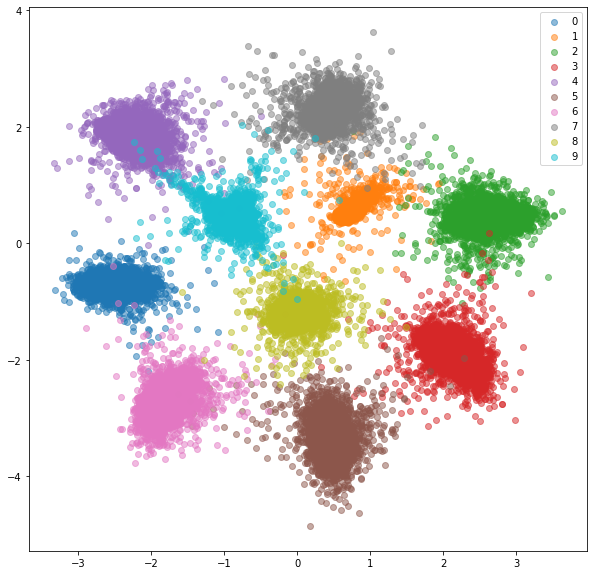

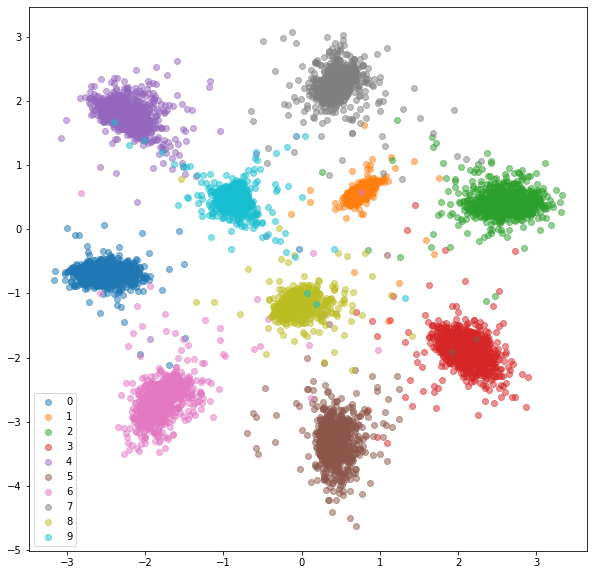

In [49]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)
train_embeddings_tl, train_labels_tl = extract_embeddings(train_loader,  )
plot_embeddings(train_embeddings_tl, train_labels_tl)
val_embeddings_tl, val_labels_tl = extract_embeddings(test_loader, model)
plot_embeddings(val_embeddings_tl, val_labels_tl)